In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [2]:
fitness_df = pd.read_csv("Resources/Project_Fitness.csv")
fitness_df.head()

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,10/6/17,5464,200,181,5,0,66
1,10/7/17,6041,100,197,8,0,66
2,10/8/17,25,100,0,5,0,66
3,10/9/17,5461,100,174,4,0,66
4,10/10/17,6915,200,223,5,500,66


In [3]:
fitness_df = fitness_df.rename(columns={'bool_of_active': 'active_status', 'weight_kg': 'weight_lbs'})
fitness_df.head()

,date,step_count,mood,calories_burned,hours_of_sleep,active_status,weight_lbs
0,10/6/17,5464,200,181,5,0,66
1,10/7/17,6041,100,197,8,0,66
2,10/8/17,25,100,0,5,0,66
3,10/9/17,5461,100,174,4,0,66
4,10/10/17,6915,200,223,5,500,66


In [4]:
for i in range(len(fitness_df['mood'])):
    if fitness_df['mood'][i] == 300:
        fitness_df.at[i,'moods'] = 'Happy'
    elif fitness_df['mood'][i] == 200:
        fitness_df.at[i,'moods'] = 'Neutral'
    elif fitness_df['mood'][i] == 100:
        fitness_df.at[i,'moods'] = 'Sad'
    else:
        print('error')

fitness_df = fitness_df.drop('mood', axis=1)

fitness_df.head()

,date,step_count,calories_burned,hours_of_sleep,active_status,weight_lbs,moods
0,10/6/17,5464,181,5,0,66,Neutral
1,10/7/17,6041,197,8,0,66,Sad
2,10/8/17,25,0,5,0,66,Sad
3,10/9/17,5461,174,4,0,66,Sad
4,10/10/17,6915,223,5,500,66,Neutral


In [5]:
for i in range(len(fitness_df['active_status'])):
    if fitness_df['active_status'][i] == 0:
        fitness_df.at[i,'activity_status'] = 'Inactive'
    elif fitness_df['active_status'][i] == 500:
        fitness_df.at[i,'activity_status'] = 'Active'
    else:
        print('error')
        
fitness_df = fitness_df.drop('active_status', axis=1)
        
fitness_df.head()

,date,step_count,calories_burned,hours_of_sleep,weight_lbs,moods,activity_status
0,10/6/17,5464,181,5,66,Neutral,Inactive
1,10/7/17,6041,197,8,66,Sad,Inactive
2,10/8/17,25,0,5,66,Sad,Inactive
3,10/9/17,5461,174,4,66,Sad,Inactive
4,10/10/17,6915,223,5,66,Neutral,Active


In [6]:
fitness_df['weight_lbs'] = round((fitness_df['weight_lbs']*2.20462),2)
fitness_df.head()

,date,step_count,calories_burned,hours_of_sleep,weight_lbs,moods,activity_status
0,10/6/17,5464,181,5,145.5,Neutral,Inactive
1,10/7/17,6041,197,8,145.5,Sad,Inactive
2,10/8/17,25,0,5,145.5,Sad,Inactive
3,10/9/17,5461,174,4,145.5,Sad,Inactive
4,10/10/17,6915,223,5,145.5,Neutral,Active


In [7]:
step_count_mean = fitness_df.groupby(['activity_status']).mean()['step_count']
step_count_median = fitness_df.groupby(['activity_status']).median()['step_count']
step_count_variance = fitness_df.groupby(['activity_status']).var()['step_count']
step_count_standard_deviation = fitness_df.groupby(['activity_status']).std()['step_count']

step_count_stats = pd.DataFrame({"Step Count Mean" : step_count_mean,
                                    "Step Count Median" : step_count_median,
                                    "Step Count Variance" : step_count_variance,
                                    "Step Count Standard Deviation" : step_count_standard_deviation})

step_count_stats = step_count_stats[["Step Count Mean", 
                                            "Step Count Median",
                                            "Step Count Variance",
                                            "Step Count Standard Deviation"]]

step_count_stats.head()

,Step Count Mean,Step Count Median,Step Count Variance,Step Count Standard Deviation
activity_status,,,,
Active,3226.571429,3362.0,5.010156e+06,2238.337734
Inactive,2709.888889,2486.5,4.239923e+06,2059.107323


In [8]:
print(f'The more steps he takes the more active he is.')

The more steps he takes the more active he is.


In [9]:
step_count_mean = fitness_df.groupby(['moods']).mean()['step_count']
step_count_median = fitness_df.groupby(['moods']).median()['step_count']
step_count_variance = fitness_df.groupby(['moods']).var()['step_count']
step_count_standard_deviation = fitness_df.groupby(['moods']).std()['step_count']

step_count_mood_stats = pd.DataFrame({"Step Count Mean" : step_count_mean,
                                    "Step Count Median" : step_count_median,
                                    "Step Count Variance" : step_count_variance,
                                    "Step Count Standard Deviation" : step_count_standard_deviation})

step_count_mood_stats = step_count_mood_stats[["Step Count Mean", 
                                            "Step Count Median",
                                            "Step Count Variance",
                                            "Step Count Standard Deviation"]]

step_count_mood_stats.head()

,Step Count Mean,Step Count Median,Step Count Variance,Step Count Standard Deviation
moods,,,,
Happy,3392.725000,4048.5,4.473253e+06,2115.006540
Neutral,3153.777778,3066.0,4.375466e+06,2091.761446
Sad,2103.068966,1258.0,4.231300e+06,2057.012361


In [10]:
print(f'The more active he is the higher his mood is.')

The more active he is the higher his mood is.


In [11]:
hours_of_sleep_mean = fitness_df.groupby(['moods']).mean()['hours_of_sleep']
hours_of_sleep_median = fitness_df.groupby(['moods']).median()['hours_of_sleep']
hours_of_sleep_variance = fitness_df.groupby(['moods']).var()['hours_of_sleep']
hours_of_sleep_standard_deviation = fitness_df.groupby(['moods']).std()['hours_of_sleep']

sleep_vs_mood_stats = pd.DataFrame({"Hours of Sleep Mean" : hours_of_sleep_mean,
                                    "Hours of Sleep Median" : hours_of_sleep_median,
                                    "Hours of Sleep Variance" : hours_of_sleep_variance,
                                    "Hours of Sleep Standard Deviation" : hours_of_sleep_standard_deviation})

sleep_vs_mood_stats = sleep_vs_mood_stats[["Hours of Sleep Mean", 
                                            "Hours of Sleep Median",
                                            "Hours of Sleep Variance",
                                            "Hours of Sleep Standard Deviation"]]

sleep_vs_mood_stats.head()

,Hours of Sleep Mean,Hours of Sleep Median,Hours of Sleep Variance,Hours of Sleep Standard Deviation
moods,,,,
Happy,5.725000,5.5,2.204487,1.484752
Neutral,4.666667,5.0,1.538462,1.240347
Sad,5.034483,5.0,2.605911,1.614284


In [12]:
print(f'The more sleep he gets the happier he is.')

The more sleep he gets the happier he is.


The r-squared is: 0.04291890669621571


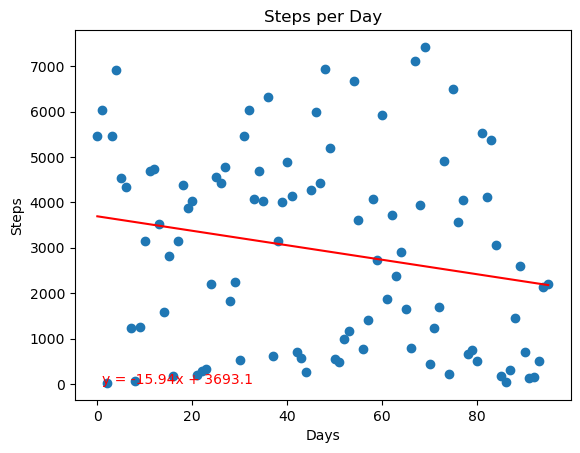

In [13]:
# Define a function to create Linear Regression plots
x_values=np.array(fitness_df.index.tolist())
y_values = fitness_df['step_count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1, 1), color='red')
plt.title('Steps per Day')
plt.ylabel('Steps')
plt.xlabel('Days')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Outputs/Linregress.png")

plt.show()

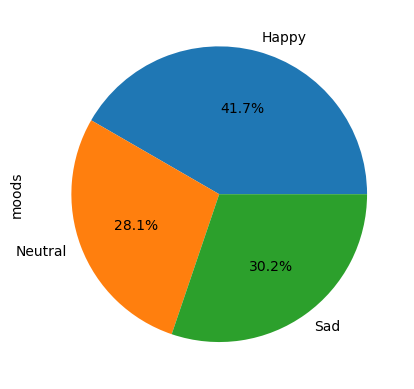

In [14]:
#pie chart for mood
mood_df = fitness_df.groupby('moods')
mood_count = mood_df['moods'].count()
mood_count.plot.pie(autopct='%1.1f%%')

plt.savefig("Outputs/PieChart.png")

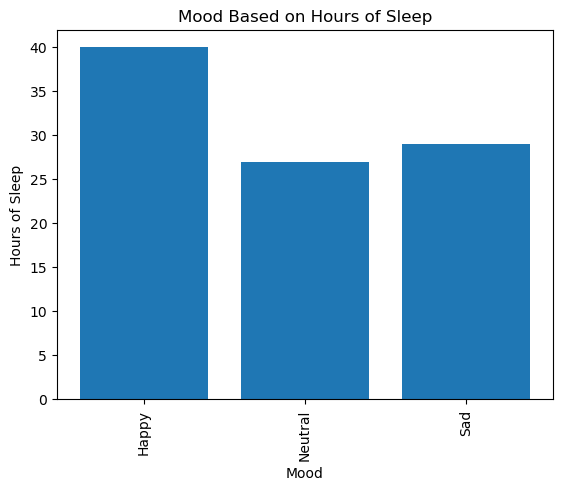

In [27]:
#bar chart for hours of sleep and mood

mood_sleep_df = mood_df['hours_of_sleep'].count()
plt.bar(mood_sleep_df.index, mood_sleep_df.values)
plt.title('Mood Based on Hours of Sleep')
plt.ylabel('Hours of Sleep') 
plt.xlabel('Mood') 
plt.xticks(rotation='vertical')

plt.savefig("Outputs/BarChartSleep.png")

plt.show()

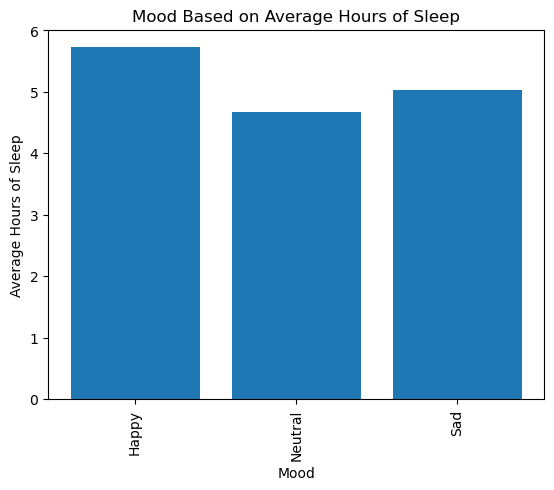

In [28]:
mood_sleep_df = mood_df['hours_of_sleep'].mean()
plt.bar(mood_sleep_df.index, mood_sleep_df.values)
plt.title('Mood Based on Average Hours of Sleep')
plt.ylabel('Average Hours of Sleep') 
plt.xlabel('Mood') 
plt.xticks(rotation='vertical')

plt.savefig("Outputs/BarChartAverageSleep.png")

plt.show()

In [26]:
print(f'On average when he sleeps over five hours he is happy. When he sleeps under five hours he is either neutral or sad')

On average when he sleeps over five hours he is happy. When he sleeps under five hours he is either neutral or sad


The r-squared is: 0.11819334421108373


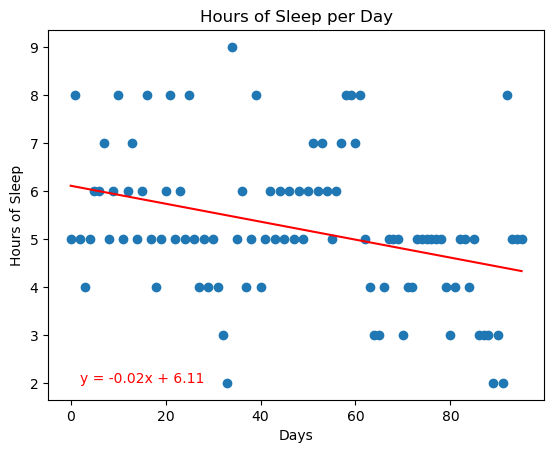

In [23]:
x_values=np.array(fitness_df.index.tolist())
y_values = fitness_df['hours_of_sleep']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2, 2), color='red')
plt.title('Hours of Sleep per Day')
plt.ylabel('Hours of Sleep')
plt.xlabel('Days')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Outputs/SleepPerDay.png")

plt.show()

In [16]:
#whiskers step/activity
list_of_status = ["Active", "Inactive"]
step_count_list = []
for status in list_of_status:
    location = fitness_df.loc[fitness_df["activity_status"] == status, "step_count"]
    step_count_list.append(location)
    quartiles = location.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    mean = location.mean()
    print(f'-----------------------------------------------------')
    print(f'The lower quartile of {status} is : {lowerq}')
    print(f'The upper quartile of {status} is : {upperq}')
    print(f'The interquartile range of {status} is : {iqr}')
    print(f'The mean of {status} is : {mean}')
    print(f'Values below {lower_bound} could be {status} outliers.')
    print(f'Values above {upper_bound} could be {status} outliers.')
    print(f'------------------------------------------------------')

-----------------------------------------------------
The lower quartile of Active is : 1037.0
The upper quartile of Active is : 4843.0
The interquartile range of Active is : 3806.0
The mean of Active is : 3226.5714285714284
Values below -4672.0 could be Active outliers.
Values above 10552.0 could be Active outliers.
------------------------------------------------------
-----------------------------------------------------
The lower quartile of Inactive is : 663.75
The upper quartile of Inactive is : 4411.5
The interquartile range of Inactive is : 3747.75
The mean of Inactive is : 2709.8888888888887
Values below -4957.875 could be Inactive outliers.
Values above 10033.125 could be Inactive outliers.
------------------------------------------------------


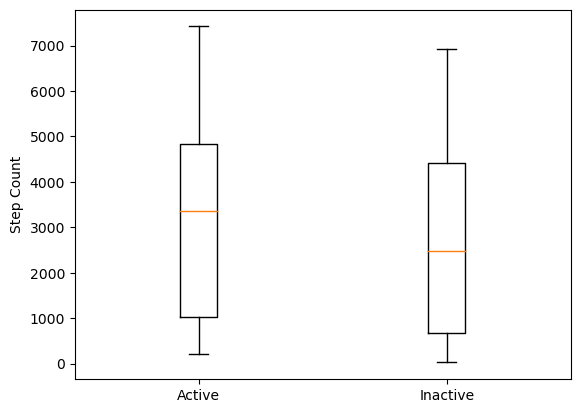

In [17]:
red_styling = dict(markerfacecolor='red', markersize=12)
plt.boxplot(step_count_list, labels=list_of_status, flierprops=red_styling)
plt.ylabel('Step Count')

plt.savefig("Outputs/BoxAndWiskerMood.png")

plt.show()

In [18]:
#mood/step box and whisker
list_of_moods = ["Happy","Neutral", "Sad"]
step_count_list = []
for moods in list_of_moods:
    location = fitness_df.loc[fitness_df["moods"] == moods, "step_count"]
    step_count_list.append(location)
    quartiles = location.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    mean = location.mean()
    print(f'-----------------------------------------------------')
    print(f'The lower quartile of {moods} is : {lowerq}')
    print(f'The upper quartile of {moods} is : {upperq}')
    print(f'The interquartile range of {moods} is : {iqr}')
    print(f'The mean of {moods} is : {mean}')
    print(f'Values below {lower_bound} could be {moods} outliers.')
    print(f'Values above {upper_bound} could be {moods} outliers.')
    print(f'------------------------------------------------------')

-----------------------------------------------------
The lower quartile of Happy is : 1314.5
The upper quartile of Happy is : 4804.25
The interquartile range of Happy is : 3489.75
The mean of Happy is : 3392.725
Values below -3920.125 could be Happy outliers.
Values above 10038.875 could be Happy outliers.
------------------------------------------------------
-----------------------------------------------------
The lower quartile of Neutral is : 1339.0
The upper quartile of Neutral is : 4245.5
The interquartile range of Neutral is : 2906.5
The mean of Neutral is : 3153.777777777778
Values below -3020.75 could be Neutral outliers.
Values above 8605.25 could be Neutral outliers.
------------------------------------------------------
-----------------------------------------------------
The lower quartile of Sad is : 299.0
The upper quartile of Sad is : 3721.0
The interquartile range of Sad is : 3422.0
The mean of Sad is : 2103.0689655172414
Values below -4834.0 could be Sad outliers.


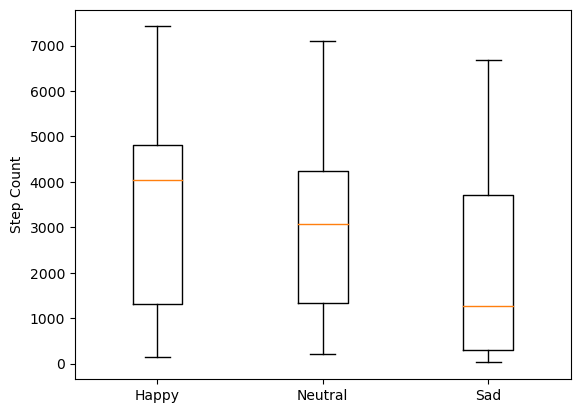

In [19]:
red_styling = dict(markerfacecolor='red', markersize=12)
plt.boxplot(step_count_list, labels=list_of_moods, flierprops=red_styling)
plt.ylabel('Step Count')

plt.savefig("Outputs/BoxAndWiskerStep.png")

plt.show()

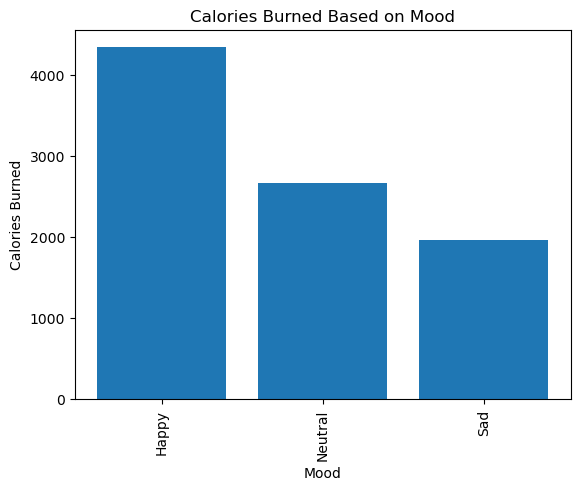

In [29]:
#calories burned and mood bar chart
mood_calorie_df = mood_df['calories_burned'].sum()
plt.bar(mood_calorie_df.index, mood_calorie_df.values)
plt.title('Calories Burned Based on Mood')
plt.ylabel('Calories Burned') 
plt.xlabel('Mood') 
plt.xticks(rotation='vertical') 

plt.savefig("Outputs/BarChartCalories.png")

plt.show()